In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

***Basic SELECT & Filtering***

**Question:** **List all movies released after 2015**.

In [3]:
query = """
SELECT title
FROM movies
WHERE CAST(RIGHT(title, 5) AS UNSIGNED) > 2015;
"""

cursor.execute(query)
result = cursor.fetchall()

# Convert to DataFrame
data = pd.DataFrame(result, columns=["title"])
data


,title
0,Ben-hur (2016)
1,Warcraft (2016)
2,Pirates of the Caribbean: Dead Men Tell No Tal...
3,Justice League (2017)
4,Deadpool (2016)
...,...
401,Gintama (2017)
402,Black Butler: Book of the Atlantic (2017)
403,No Game No Life: Zero (2017)
404,Flint (2017)


**question :** **Find all movies in the "Comedy" genre**.


In [4]:
query = """
SELECT title
FROM movies
WHERE genres LIKE '%Comedy%';
"""

cursor.execute(query)
result = cursor.fetchall()

# Convert to DataFrame
data = pd.DataFrame(result, columns=["title"])
data


,title
0,Toy Story (1995)
1,Grumpier Old Men (1995)
2,Waiting to Exhale (1995)
3,Father of the Bride Part II (1995)
4,Sabrina (1995)
...,...
3751,Gintama: The Movie (2010)
3752,Silver Spoon (2014)
3753,Black Butler: Book of the Atlantic (2017)
3754,No Game No Life: Zero (2017)


**question:** **Display movies with a rating higher than 4.5**.

In [5]:
query = """
select m.title,r.rating from movies m 
join ratings r on m.movieId = cast(r.movieId as unsigned)
where rating > 4.5
"""

cursor.execute(query)
result = cursor.fetchall()

# Convert to DataFrame
data = pd.DataFrame(result, columns=["title","rating"])
data


,title,rating
0,Seven (a.k.a. Se7en) (1995),5.0
1,"Usual Suspects, The (1995)",5.0
2,Bottle Rocket (1996),5.0
3,Rob Roy (1995),5.0
4,Canadian Bacon (1995),5.0
...,...,...
13206,Captain America: Civil War (2016),5.0
13207,Tokyo Tribe (2014),5.0
13208,The Nice Guys (2016),5.0
13209,Arrival (2016),5.0


**question** **Count how many movies exist in each genre**.

In [6]:
query = """WITH separate AS (
    SELECT 
        m.movieId,
        m.title,
        jt.genre
    FROM movies m
    JOIN JSON_TABLE(
        CONCAT('["', REPLACE(m.genres, '|', '","'), '"]'),
        "$[*]" COLUMNS (genre VARCHAR(50) PATH "$")
    ) AS jt
)
SELECT 
    genre, 
    COUNT(*) AS movie_count
FROM separate
GROUP BY genre
ORDER BY movie_count DESC
"""

cursor.execute(query)
result = cursor.fetchall()

data = pd.DataFrame(result, columns=["genre", "movie_count"])
data



,genre,movie_count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


**question** **Find the average rating of each movie.**

In [7]:
query = '''SELECT 
    m.title,
    ROUND(AVG(r.rating), 2) AS avg_rating
FROM movies m
JOIN ratings r ON m.movieId = CAST(r.movieId AS UNSIGNED)
GROUP BY m.movieId, m.title
ORDER BY avg_rating DESC;'''

cursor.execute(query)
result = cursor.fetchall()

# Convert to DataFrame
data = pd.DataFrame(result, columns=["title","avg_rating"])
data



,title,avg_rating
0,Dylan Moran: Monster (2004),5.0
1,Strictly Sexual (2008),5.0
2,"Story of Women (Affaire de femmes, Une) (1988)",5.0
3,"Passenger, The (Professione: reporter) (1975)",5.0
4,"Marriage of Maria Braun, The (Ehe der Maria Br...",5.0
...,...,...
9719,Oblivion 2: Backlash (1996),0.5
9720,Mortal Kombat: The Journey Begins (1995),0.5
9721,Idaho Transfer (1973),0.5
9722,"Crow, The: Wicked Prayer (2005)",0.5


**question:** **Find the total number of ratings given by each user**.

In [8]:
query = """ 
SELECT userId, SUM(rating) AS total_rating 
FROM ratings
GROUP BY userId 
ORDER BY total_rating DESC
"""
cursor.execute(query)
result = cursor.fetchall()


data = pd.DataFrame(result, columns=["userId","total_rating"])



data

,userId,total_rating
0,414.0,9151.5
1,474.0,7165.0
2,599.0,6547.0
3,448.0,5307.5
4,610.0,4802.5
...,...,...
605,245.0,57.0
606,293.0,55.0
607,431.0,54.5
608,508.0,51.5


**question** **List the top 10 movies with the highest average rating**.

In [9]:
query = """select movieId,rating from ratings 
where rating >(
select round(avg(rating),2) as avg_rating from ratings) 
order by rating desc
limit 10
"""

cursor.execute(query)
result = cursor.fetchall()

# Convert to DataFrame
data = pd.DataFrame(result, columns=["movieId","rating"])
data

,movieId,rating
0,2912.0,5.0
1,215.0,5.0
2,1041.0,5.0
3,260.0,5.0
4,293.0,5.0
5,296.0,5.0
6,377.0,5.0
7,7579.0,5.0
8,380.0,5.0
9,407.0,5.0


**question :** ** List the top 5 users who rated the most movies**.

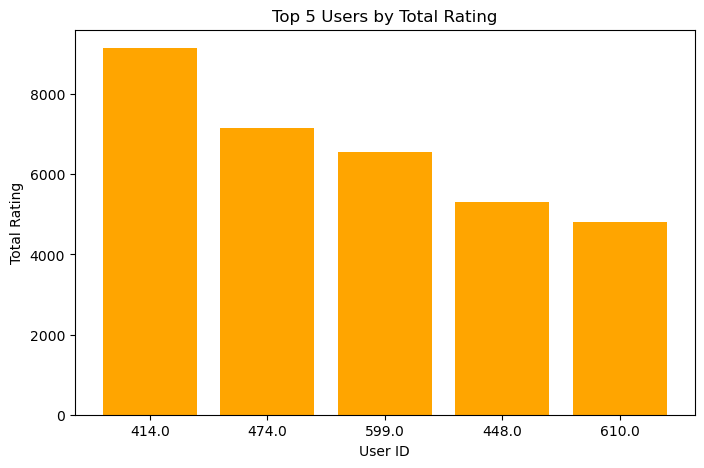

In [10]:
query = """ 
SELECT userId, SUM(rating) AS total_rating FROM ratings GROUP BY userId 
ORDER BY total_rating DESC
"""
cursor.execute(query)
result = cursor.fetchall()

data = pd.DataFrame(result, columns=["userId","total_rating"])

# Take top 5 users
top_five = data.head(5)


plt.figure(figsize=(8,5))
plt.bar(top_five["userId"], top_five["total_rating"], color="orange")

plt.xlabel("User ID")
plt.ylabel("Total Rating")
plt.title("Top 5 Users by Total Rating")
plt.show()


In [11]:
query = """select movieId,timestamp from ratings
order by timestamp desc"""

cursor.execute(query)
result = cursor.fetchall()


data = pd.DataFrame(result,columns=["movieId","timestamp"])
data.head(5)

,movieId,timestamp
0,4223.0,999873731.0
1,2916.0,999708390.0
2,1580.0,999708390.0
3,2115.0,999708378.0
4,1047.0,999708378.0


**question :** **List all movies along with their ratings**.

In [12]:
query = """select movies.title,ratings.rating from movies
left join ratings on ratings.movieId = movies.movieId"""

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["title","rating"])
data.head(5)

,title,rating
0,"Cry, the Beloved Country (1995)",None
1,Bottle Rocket (1996),None
2,Batman Forever (1995),None
3,Die Hard: With a Vengeance (1995),None
4,Mad Love (1995),None


**question : ** **Show movies with their corresponding tags applied by users**.

In [13]:
query = """select movies.title , tags.tag from movies
join tags on movies.movieId = tags.movieId"""

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["title","tag"])
data.head(5)

,title,tag
0,Toy Story (1995),fun
1,Toy Story (1995),pixar
2,Toy Story (1995),pixar
3,Jumanji (1995),game
4,Jumanji (1995),Robin Williams


**question:** **Find movies and the number of times each has been tagged**.

In [14]:
query = """
select m.title , count(t.tag) as num_count from movies m
join tags t on m.movieId = t.movieId
group by m.title
order by num_count desc"""

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["title","num_tag"])
data

,title,num_tag
0,Pulp Fiction (1994),181
1,Fight Club (1999),54
2,2001: A Space Odyssey (1968),41
3,Léon: The Professional (a.k.a. The Professiona...,35
4,Eternal Sunshine of the Spotless Mind (2004),34
...,...,...
1567,Beasts of No Nation (2015),1
1568,Rabbits (2002),1
1569,Everybody Wants Some (2016),1
1570,Don't Breathe (2016),1


**question:** **Find movies along with IMDb links (from links.csv )**.

In [15]:
query = """ select m.title , l.imdbId from movies m 
join links l on m.movieId = cast(l.movieId as unsigned)"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["title","imdbId"])
data.head(3)

,title,imdbId
0,Toy Story (1995),114709.0
1,Jumanji (1995),113497.0
2,Grumpier Old Men (1995),113228.0


**question:** **Find all Comedy movies rated higher than 4**.

In [16]:
query = """with hole as (select r.rating,m.movieId,m.title from movies m
join ratings r on m.movieId = cast(r.movieId as unsigned)
where genres like "%Comedy%")
select  rating ,title from hole 
where rating > 4
 """
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["rating","title"])
data.head(5)

,rating,title
0,5.0,Bottle Rocket (1996)
1,5.0,Canadian Bacon (1995)
2,5.0,Billy Madison (1995)
3,5.0,Dumb & Dumber (Dumb and Dumber) (1994)
4,5.0,Tommy Boy (1995)


**question:** **Find users who have rated the movie “Toy Story (1995)” **.

In [17]:
query =  """select r.rating,m.movieId,m.title,r.userId from movies m
join ratings r on m.movieId = cast(r.movieId as unsigned)
where title = 'Toy Story (1995)' """

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["rating","movieId","title","userId"])
data.head(3)

,rating,movieId,title,userId
0,4.0,1,Toy Story (1995),1.0
1,4.0,1,Toy Story (1995),5.0
2,4.5,1,Toy Story (1995),7.0


**question:** **List all movies rated by user with userId = 1 along with their ratings**.

In [18]:
query = """select r.rating,m.movieId,m.title,r.userId from movies m
join ratings r on m.movieId = cast(r.movieId as unsigned)
where userId  = 1"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns=["rating","movieId","title","userId"])
data.head(3)

,rating,movieId,title,userId
0,4.0,1,Toy Story (1995),1.0
1,4.0,3,Grumpier Old Men (1995),1.0
2,4.0,6,Heat (1995),1.0


**Window Functions**

***Rank movies by average rating within each genre***.

In [19]:
query = """WITH separate AS (
    SELECT 
        m.movieId,
        m.title,
        jt.genre
    FROM movies m
    JOIN JSON_TABLE(
        CONCAT('["', REPLACE(m.genres, '|', '","'), '"]'),
        "$[*]" COLUMNS (genre VARCHAR(50) PATH "$")
    ) AS jt
),
part AS (
    SELECT 
        s.movieId,
        s.title,
        s.genre,
        ROUND(AVG(r.rating), 2) AS avg_rating
    FROM separate s
    JOIN ratings r 
        ON s.movieId = CAST(r.movieId AS UNSIGNED)
    GROUP BY s.genre, s.movieId, s.title
)
SELECT 
    p.*,
    RANK() OVER (PARTITION BY p.genre ORDER BY p.avg_rating DESC) AS genre_rank
FROM part p
ORDER BY p.genre, genre_rank;"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["movieId",
        "title",
        "genre",
        "avg_rating"," genre_rank"])
data.head(3)




,movieId,title,genre,avg_rating,genre_rank
0,176601,Black Mirror,(no genres listed),5.0,1
1,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),5.0,1
2,171749,Death Note: Desu nôto (2006–2007),(no genres listed),5.0,1


**question:** ** Show the top 3 movies per genre based on average rating**.

In [20]:
query = """

WITH separate AS (
  
    SELECT 
        m.movieId,
        m.title,
        jt.genre
    FROM movies m
    JOIN JSON_TABLE(
        CONCAT('["', REPLACE(m.genres, '|', '","'), '"]'),
        "$[*]" COLUMNS (genre VARCHAR(50) PATH "$")
    ) AS jt
),
part AS (
    
    SELECT 
        s.movieId,
        s.title,
        s.genre,
        ROUND(AVG(r.rating), 2) AS avg_rating
    FROM separate s
    JOIN ratings r 
        ON s.movieId = CAST(r.movieId AS UNSIGNED)
    GROUP BY s.genre, s.movieId, s.title
),
ranking as (SELECT 
    p.movieId,
    p.title,
    p.genre,
    p.avg_rating,
    rank() OVER (PARTITION BY p.genre ORDER BY p.avg_rating DESC) AS genre_rank
FROM part p
)
select * from ranking 
where genre_rank <= 3
ORDER BY genre, genre_rank


"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["movieId",
        "title",
        "genre",
        "avg_rating"," genre_rank"])
data


,movieId,title,genre,avg_rating,genre_rank
0,176601,Black Mirror,(no genres listed),5.0,1
1,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),5.0,1
2,171749,Death Note: Desu nôto (2006–2007),(no genres listed),5.0,1
3,876,Supercop 2 (Project S) (Chao ji ji hua) (1993),Action,5.0,1
4,95149,Superman/Batman: Public Enemies (2009),Action,5.0,1
...,...,...,...,...,...
629,122092,Guy X (2005),War,5.0,1
630,69860,Eichmann (2007),War,5.0,1
631,128087,Trinity and Sartana Are Coming (1972),Western,5.0,1
632,3792,Duel in the Sun (1946),Western,5.0,1


**question:** **Calculate a running total of ratings per user**.

In [21]:
query = """ select userId,sum(rating) over (partition by userId order by userId 
ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as total_ranking from ratings """
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["userId","total_ranking"])
data

,userId,total_ranking
0,1.0,4.0
1,1.0,8.0
2,1.0,12.0
3,1.0,17.0
4,1.0,22.0
...,...,...
100831,99.0,188.0
100832,99.0,192.0
100833,99.0,195.0
100834,99.0,200.0


In [22]:
query = """SELECT m.title, r.rating
FROM movies m
JOIN ratings r 
  ON m.movieId = CAST(r.movieId AS UNSIGNED)
WHERE r.rating > (
    SELECT ROUND(AVG(rating), 2) 
    FROM ratings
);

"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["title","rating"])
data

,title,rating
0,Toy Story (1995),4.0
1,Grumpier Old Men (1995),4.0
2,Heat (1995),4.0
3,Seven (a.k.a. Se7en) (1995),5.0
4,"Usual Suspects, The (1995)",5.0
...,...,...
48575,The Nice Guys (2016),5.0
48576,Hell or High Water (2016),4.0
48577,Arrival (2016),5.0
48578,Rogue One: A Star Wars Story (2016),4.0


**question:** **Find users who rated more than 50 movies**.


In [23]:
query = """with count_rate as 
(select userId,count(rating) as count_rating from ratings
group by userId) 
select * from count_rate
where count_rating > 50"""

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["userId","rating"])
data

,userId,rating
0,1.0,232
1,4.0,216
2,6.0,314
3,7.0,152
4,10.0,140
...,...,...
373,605.0,221
374,606.0,1115
375,607.0,187
376,608.0,831


**question:** **List movies that have never received a rating of 5**.

In [24]:
query = """SELECT movieId,rating
FROM ratings
WHERE rating <> 5;"""

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["movieId","rating"])
data



,movieId,rating
0,1.0,4.0
1,3.0,4.0
2,6.0,4.0
3,70.0,3.0
4,110.0,4.0
...,...,...
87620,163937.0,3.5
87621,163981.0,3.5
87622,166528.0,4.0
87623,166534.0,4.0


**question:** **Find the most popular tag (used the most by users)**.

In [25]:
query = """select tag ,count(tag) count_tag from tags
group by tag
order by count_tag desc"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["tag","count_tag"])
data.head(5)

,tag,count_tag
0,In Netflix queue,131
1,atmospheric,41
2,funny,24
3,superhero,24
4,surreal,24


**question:** **Find the genre with the highest average movie rating**.


In [26]:
query = """WITH separate AS (
    SELECT 
        m.movieId,
        m.title,
        jt.genre
    FROM movies m
    JOIN JSON_TABLE(
        CONCAT('["', REPLACE(m.genres, '|', '","'), '"]'),
        "$[*]" COLUMNS (genre VARCHAR(50) PATH "$")
    ) AS jt
),
avg_rate AS (
    SELECT 
        s.movieId,
        s.title,
        s.genre,
        ROUND(AVG(r.rating), 2) AS avg_rating
    FROM separate s
    JOIN ratings r 
        ON s.movieId = CAST(r.movieId AS UNSIGNED)
    GROUP BY s.title, s.genre, s.movieId
)
SELECT avg_rate.genre
FROM avg_rate
JOIN ratings r 
    ON avg_rate.movieId = CAST(r.movieId AS UNSIGNED)
WHERE r.rating > avg_rate.avg_rating
    group by avg_rate.genre
"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["avg_rate"])
data

,avg_rate
0,Fantasy
1,Comedy
2,Children
3,Animation
4,Adventure
5,Romance
6,Thriller
7,Crime
8,Action
9,Mystery


**question:** **Find the average rating given per year of release**.

In [27]:
query = """WITH data AS (
    SELECT 
        m.movieId,
        TRIM(SUBSTRING_INDEX(m.title, '(', 1)) AS movie_name,
        REPLACE(SUBSTRING_INDEX(SUBSTRING_INDEX(m.title, '(', -1), ')', 1), ')', '') AS release_year
    FROM movies m
)
SELECT d.release_year,round(avg(r.rating),2)
FROM data d
join ratings r on d.movieID = cast(r.movieId as unsigned)
group by d.release_year
"""
cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["release_year","avg_rating"])
data

,release_year,avg_rating
0,1995,3.44
1,1996,3.34
2,1994,3.50
3,1977,3.81
4,1993,3.45
...,...,...
114,Ready Player One,3.50
115,Cosmos,4.50
116,The OA,4.00
117,Hyena Road,2.00


**question:** **Find movies with at least 50 ratings and an average rating above 4**.

In [28]:
query = '''SELECT  
    r.movieId, 
    COUNT(r.rating) 
FROM movies_db.ratings r
WHERE r.rating > 4.0
GROUP BY r.movieId
having COUNT(r.rating)  >= 50'''

cursor.execute(query)
result = cursor.fetchall()
data = pd.DataFrame(result,columns = ["movieId","rating"])
data.head(5)

,movieId,rating
0,47.0,81
1,50.0,113
2,260.0,128
3,457.0,58
4,527.0,128
